# Inteligência Artificial: Classificação
## Teste de Performance - TP1

### Questão 1
Carregue o dataset disponível em "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv" para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:
1. Elimine as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”;
2. Elimine observações que contenham dados ausentes (NA);
3. Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;
4. Separe o dataframe resultante em Treino-Teste, utilizando a proporção 80-20%.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importar os dados
dataset = pd.read_csv("./titanic_data.csv")

# Questão 1.1
eliminar = ["PassengerId", "Name", "Ticket", "Cabin"]
dataset = dataset.drop(columns=eliminar)

# Questão 1.2
dataset = dataset.dropna()

# Questão 1.3
label_encoder = LabelEncoder()
dataset["Embarked"] = label_encoder.fit_transform(dataset["Embarked"])
target_labels = label_encoder.classes_ # classes da variável dependente
dataset["Sex"] = label_encoder.fit_transform(dataset["Sex"])

# Questão 1.4
RANDOM_STATE = 11
TEST_SIZE = 0.2
features = dataset.drop(columns=["Embarked"]) # todas as colunas, exceto a variável dependente
target = dataset["Embarked"] # variável dependente (variável que se quer prever)
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(dataset)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0      1      0   7.2500         2
1           1       1    0  38.0      1      0  71.2833         0
2           1       3    0  26.0      0      0   7.9250         2
3           1       1    0  35.0      1      0  53.1000         2
4           0       3    1  35.0      0      0   8.0500         2
..        ...     ...  ...   ...    ...    ...      ...       ...
885         0       3    0  39.0      0      5  29.1250         1
886         0       2    1  27.0      0      0  13.0000         2
887         1       1    0  19.0      0      0  30.0000         2
889         1       1    1  26.0      0      0  30.0000         0
890         0       3    1  32.0      0      0   7.7500         1

[712 rows x 8 columns]


### Questão 2
A partir do dataframe totalmente transformado da questão 1, aplique um modelo de árvore de decisão simples, utilizando os parâmetros default apresentados pela biblioteca Scikit-learn.
1. Apresente a matriz de confusão com o resultado da aplicação do modelo no conjunto de testes.
2. Apresente os valores encontrados para as medidas TN, TP, FN e FP.
3. Apresente a acurácia de seu modelo.
4. Apresente as métricas precision, recall e F1-score do seu modelo. 

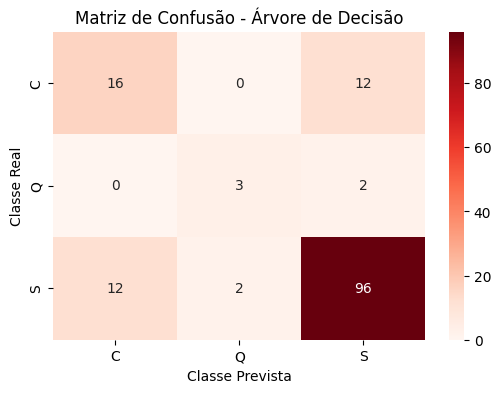

Classe 'C':
   Verdadeiros Positivos (TP): 16
   Verdadeiros Negativos (TN): 103
   Falsos Positivos (FP): 12
   Falsos Negativos (FN): 12

Classe 'Q':
   Verdadeiros Positivos (TP): 3
   Verdadeiros Negativos (TN): 136
   Falsos Positivos (FP): 2
   Falsos Negativos (FN): 2

Classe 'S':
   Verdadeiros Positivos (TP): 96
   Verdadeiros Negativos (TN): 19
   Falsos Positivos (FP): 14
   Falsos Negativos (FN): 14

Acurácia do modelo: 0.804
Precision: 0.804
Recall: 0.804
F1-score : 0.804


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Criar Árvode de Decisão Simples
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree.fit(feature_train, target_train)

# Questão 2.1
target_pred = tree.predict(feature_test) # criar previsão
cm = confusion_matrix(target_test, target_pred) # matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

# Questão 2.2
for i, target_class in enumerate(target_labels):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"Classe '{target_class}':")
    print(f"   Verdadeiros Positivos (TP): {TP}")
    print(f"   Verdadeiros Negativos (TN): {TN}")
    print(f"   Falsos Positivos (FP): {FP}")
    print(f"   Falsos Negativos (FN): {FN}")
    print()

# Questão 2.3
accuracy = accuracy_score(target_test, target_pred)
print(f"Acurácia do modelo: {accuracy:.3f}")

# Questão 2.4
precision = precision_score(target_test, target_pred, average='weighted')
recall = recall_score(target_test, target_pred, average='weighted')
f1 = f1_score(target_test, target_pred, average='weighted')
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score : {f1:.3f}")

### Questão 3
Experimente duas novas profundidades na execução de sua árvore de decisão e apresente a conclusão do impacto dessas alterações em sua árvore, a partir das novas métricas alcançadas.

In [3]:
# Definir diferentes profundidades
depths = [5, 12]
results = {}

# Para cada uma das profundidades da árvore de decisão encontrada, foram calculadas as métricas
for d in depths:
    # Criar modelo com profundidade = d
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=d)
    model.fit(feature_train, target_train)
    
    # Gerar previsões do modelo
    target_pred = model.predict(feature_test)
    
    # Calcular métricas
    accuracy = accuracy_score(target_test, target_pred)
    precision = precision_score(target_test, target_pred, average='weighted', zero_division=0)
    recall = recall_score(target_test, target_pred, average='weighted', zero_division=0)
    f1 = f1_score(target_test, target_pred, average='weighted', zero_division=0)

    # Resultados para o modelo (com profundidade d)
    results[d] = {
        'acurácia': accuracy,
        'precisão': precision,
        'recall': recall,
        'f1-score': f1,
    }

print("Profundidade:\tAcurácia:\tPrecisão:\t Recall:\tF1-score:")
for d in depths:
    print(f"{d:>12}\t{results[d]['acurácia']:>8.5f}\t{results[d]['precisão']:>8.5f}\t {results[d]['recall']:>4.5f}\t{results[d]['f1-score']:>8.5f}")


Profundidade:	Acurácia:	Precisão:	 Recall:	F1-score:
           5	 0.78322	 0.81069	 0.78322	 0.78982
          12	 0.80420	 0.80558	 0.80420	 0.80456


### Questão 4
Apresente as visualizações da árvore original e das duas árvores criadas na questão 3.

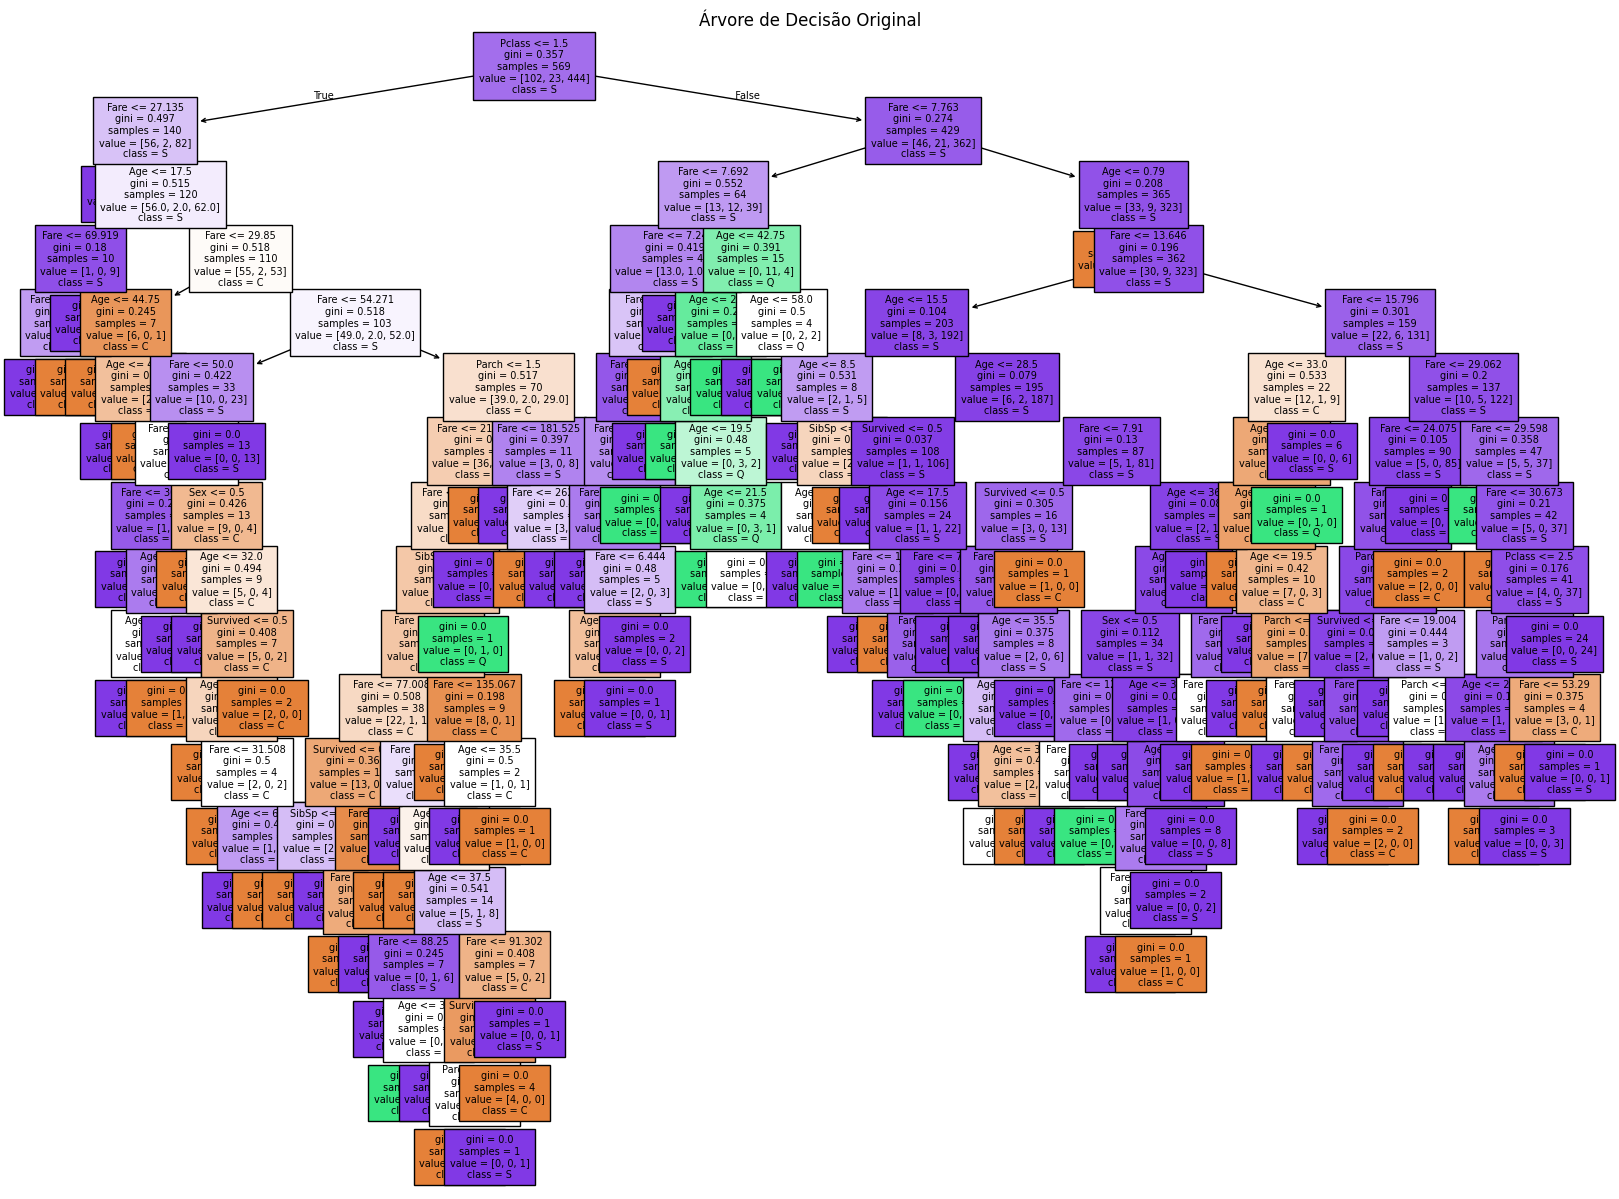

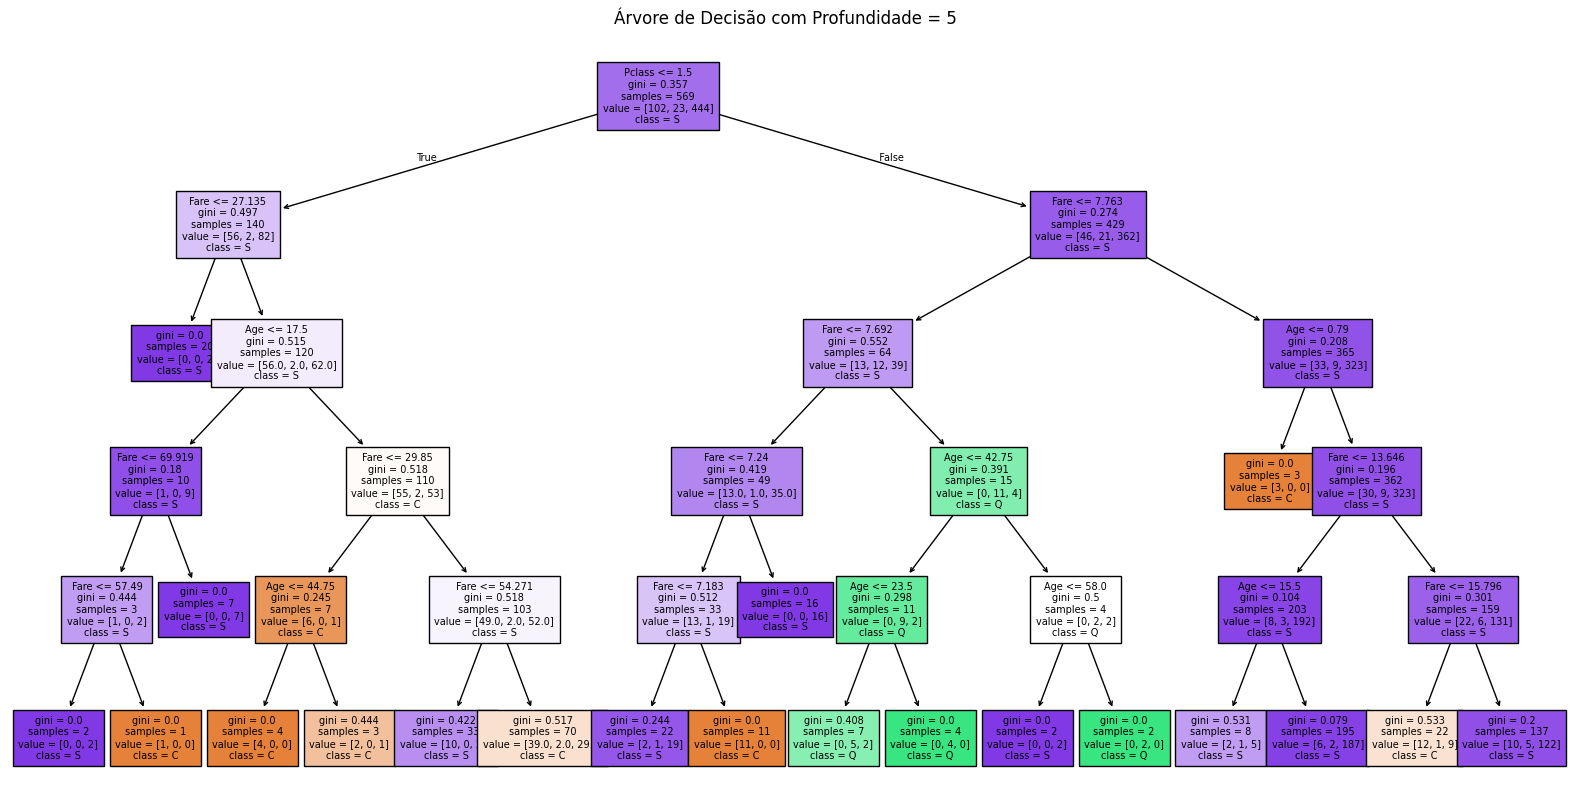

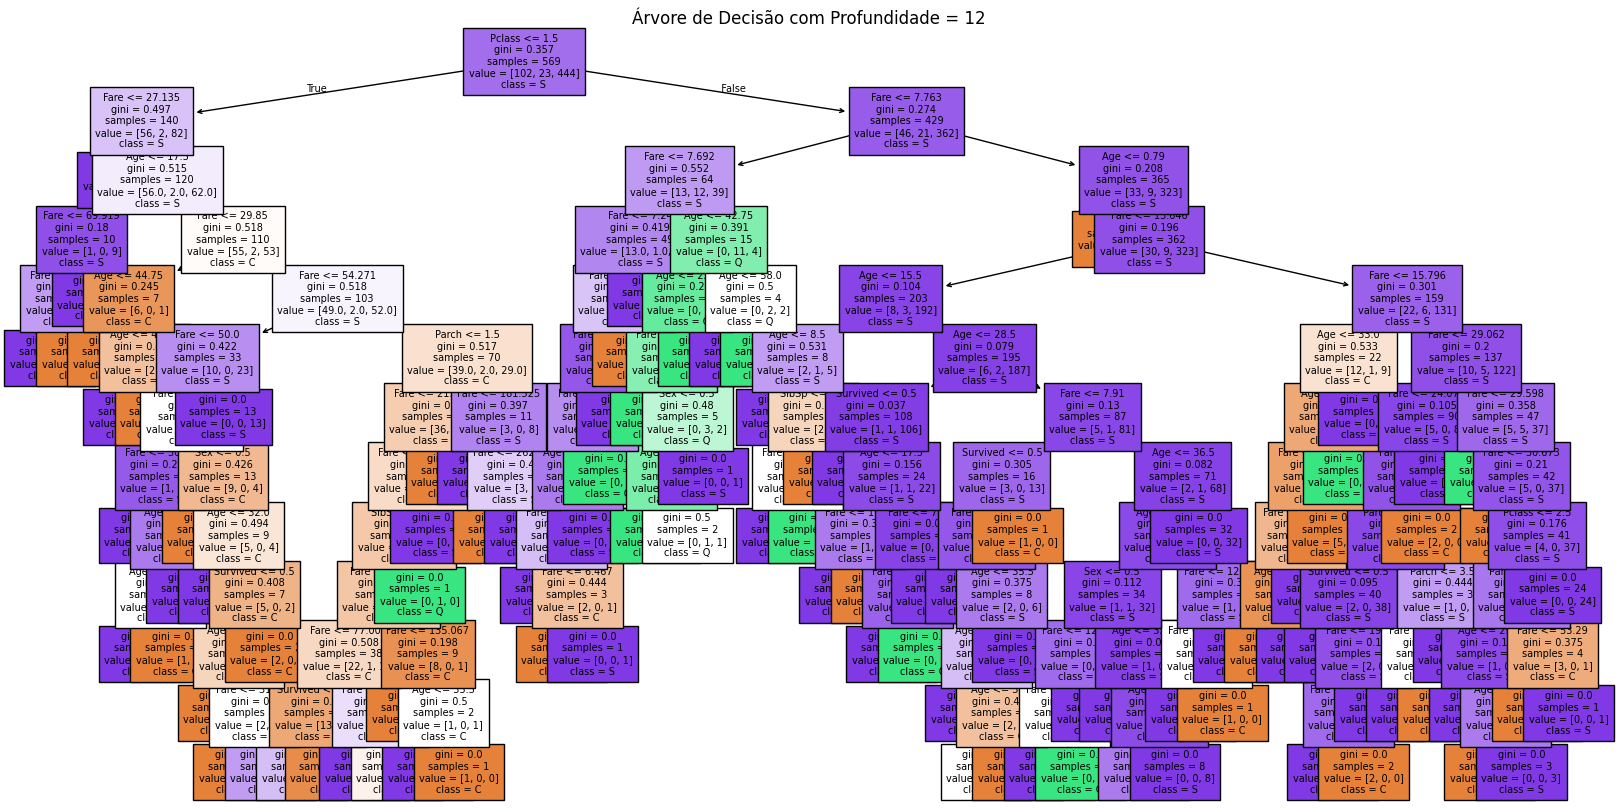

In [4]:
from sklearn.tree import plot_tree

# Árvore de Decisão Original (árvore de decisão simples)
model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(feature_train, target_train)
plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=feature_train.columns, class_names=target_labels, filled=True, fontsize=7)
plt.title("Árvore de Decisão Original")
plt.show()

# Árvore de Decisão com Profundidade = 5
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=5)
model.fit(feature_train, target_train)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_train.columns, class_names=target_labels, filled=True, fontsize=7)
plt.title("Árvore de Decisão com Profundidade = 5")
plt.show()

# Árvore de Decisão com Profundidade = 12
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=12)
model.fit(feature_train, target_train)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_train.columns, class_names=target_labels, filled=True, fontsize=7)
plt.title("Árvore de Decisão com Profundidade = 12")
plt.show()